# Sequential Workflow ( Non-LLM Based )

In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict
from langgraph.graph import START, END

### Define State

In [2]:
# Define State

class BMIState(TypedDict):
    weight_kg : float
    height_m: float
    bmi: float
    category: str

### Define Graph

In [3]:
# Defining the function for Node "calculate_bmi"
def calculate_bmi_function(state: BMIState) -> BMIState:
    
    weight = state["weight_kg"]
    height = state["height_m"]

    bmi = weight/(height**2)

    state['bmi'] = round(bmi,2)

    return state

In [4]:
# Define the function bmi_label_function

def bmi_label_function(state: BMIState) -> BMIState:

    bmi = state["bmi"]

    if bmi < 18.5:
        state["category"] = "UnderWeight"
    elif 18.5 <= bmi < 25 :
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "OverWeight"
    else:
        state["category"] = "Obese"

    return state

In [5]:
# Define Graph

graph = StateGraph(BMIState)

# Add Nodes to graph
graph.add_node('calculate_bmi_node', calculate_bmi_function) # calculate_bmi_node is Node and calculate_bmi_function is a function that will be executed - Function is defined above
graph.add_node("bmi_label_node", bmi_label_function) 

# Add Edges to graph
graph.add_edge(START, 'calculate_bmi_node')
graph.add_edge("calculate_bmi_node", "bmi_label_node")
graph.add_edge('bmi_label_node', END)

# Compile the Graph
workflow = graph.compile()

In [6]:
# Execute the Graph
initial_state = {"weight_kg":95, "height_m":1.81}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 95, 'height_m': 1.81, 'bmi': 29.0, 'category': 'OverWeight'}


### Visualizing the graph

In [7]:
from IPython.display import Image
print(workflow.get_graph().draw_ascii())

    +-----------+      
    | __start__ |      
    +-----------+      
           *           
           *           
           *           
+--------------------+ 
| calculate_bmi_node | 
+--------------------+ 
           *           
           *           
           *           
  +----------------+   
  | bmi_label_node |   
  +----------------+   
           *           
           *           
           *           
      +---------+      
      | __end__ |      
      +---------+      


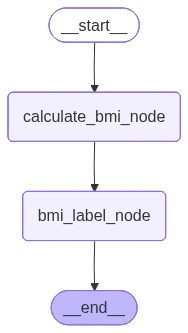

In [8]:
Image(workflow.get_graph().draw_mermaid_png())

# Sequential Workflow ( LLM Based )

In [9]:
# !pip install -U "langchain[openai]"

In [10]:
from langgraph.graph import StateGraph
from langchain.chat_models import init_chat_model

In [11]:
from langgraph.graph import START, END

In [12]:
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [13]:
model  = init_chat_model("gpt-5-nano")

In [14]:
model

ChatOpenAI(profile={'max_input_tokens': 272000, 'max_output_tokens': 128000, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x7ff8c158c4d0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7ff8c1316a20>, root_client=<openai.OpenAI object at 0x7ff8c18fdfd0>, root_async_client=<openai.AsyncOpenAI object at 0x7ff8c10e2c30>, model_name='gpt-5-nano', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [15]:
# Define State

class LLMState(TypedDict):

    question : str
    answer : str

In [20]:
# Creating a Node Function

def llm_qa_function(state: LLMState) -> LLMState:

    # Extract the question from the state
    question = state['question']

    # Form a prompt
    prompt = f"Answer the following question {question}"

    # Ask the question from the LLM 
    llm_output = model.invoke(prompt)

    # Save the answer
    state['answer'] = llm_output.content

    return state

In [21]:
# Create Graph
graph = StateGraph(LLMState)

# Create Node
graph.add_node("llm_qa_node", llm_qa_function)

# Add EDGE
graph.add_edge(START, "llm_qa_node")
graph.add_edge("llm_qa_node", END)

# Compile Graph
workflow = graph.compile()

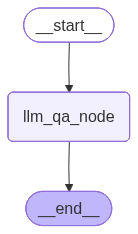

In [22]:
workflow

In [23]:
initial_state = { "question" : "How Quantum Mechanics can help in Generative AI?" }

final_state = workflow.invoke(initial_state)

print(final_state['answer'])

Short answer: Quantum mechanics can enrich generative AI both by providing new kinds of generative models that run on quantum hardware (or resemble quantum processes) and by offering quantum-inspired ideas that improve classical models. In practice, this is still an active, experimental area, with limited hardware-scale demonstrations, but several threads look promising.

What quantum mechanics can bring to generative AI

- Quantum generative models (on quantum hardware)
  - Quantum GANs (QGANs): adversarially trained generative models where at least one player (generator or discriminator) is implemented with a quantum system.
  - Quantum variational autoencoders (QVAE): using quantum circuits to encode or decode latent variables, potentially capturing complex correlations with fewer parameters.
  - Quantum Boltzmann machines and related energy-based models: use quantum dynamics or quantum sampling to model probability distributions more effectively or to explore hard energy landscapes

# PromptChaining Workflow

In [ ]:
from 